### getting files imported and sorted  
getting the sequences in and making sure that we get rid of duplicates and then separate genes (e.g. HA) to look at them separately. 


In [1]:
# imports
from Bio.SeqIO.FastaIO import SimpleFastaParser
import pandas as pd
import numpy as np
import itertools as it
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 150

In [2]:
with open('influenza.fna') as fasta_file: 
    cgi_titles = []
    cgi_sequences = []
    for title, sequence in SimpleFastaParser(fasta_file):
        cgi_titles.append(title)
        cgi_sequences.append(sequence)

In [3]:
influenza_na = pd.DataFrame(list(zip(cgi_titles, cgi_sequences)), columns=['titles','sequences'])

In [4]:
influenza_na.head()

,titles,sequences
0,gi|58576|gb|X52226|Influenza A virus (A/FPV/Ro...,AGCAAAAGCAGGAGTTCAAAATGAATCCAAATCAGAAAATAATAAC...
1,gi|59292|gb|X53029|Influenza A virus (A/USSR/9...,AGCAAAAGCAGGTAGATGTTGAAAGATGAGTCTTCTAACCGAGGTC...
2,gi|59294|gb|X59778|Influenza A virus (A/NIB/4/...,GGATCCTGTTATGTGCATTTACAGCTACAGATGCAGACACAATATG...
3,gi|59296|gb|X66320|Influenza A virus (A/Chile/...,ACACCAAATGGAACGAAAATCAGAACCCTAGAATGTTTTTGGCCAT...
4,gi|60457|gb|X08088|Influenza A virus (A/WSN/33...,ATGAGTCTTCTAACCGAGGTCGAAACGTACGTTCTCTCTATCGTCC...


In [5]:
influenza_na.shape

(655764, 2)

remove duplicate sequences

In [6]:
uniflna = influenza_na.drop_duplicates('sequences')

In [7]:
uniflna.head()

,titles,sequences
0,gi|58576|gb|X52226|Influenza A virus (A/FPV/Ro...,AGCAAAAGCAGGAGTTCAAAATGAATCCAAATCAGAAAATAATAAC...
1,gi|59292|gb|X53029|Influenza A virus (A/USSR/9...,AGCAAAAGCAGGTAGATGTTGAAAGATGAGTCTTCTAACCGAGGTC...
2,gi|59294|gb|X59778|Influenza A virus (A/NIB/4/...,GGATCCTGTTATGTGCATTTACAGCTACAGATGCAGACACAATATG...
3,gi|59296|gb|X66320|Influenza A virus (A/Chile/...,ACACCAAATGGAACGAAAATCAGAACCCTAGAATGTTTTTGGCCAT...
4,gi|60457|gb|X08088|Influenza A virus (A/WSN/33...,ATGAGTCTTCTAACCGAGGTCGAAACGTACGTTCTCTCTATCGTCC...


In [8]:
uniflna.shape

(441221, 2)

get just the HA gene sequences (for now, other genes later)

In [74]:
uniflna_HA = uniflna.loc[uniflna.iloc[:,0].str.contains(r'\(HA\) | hemagglutinin | (segment 4)')]

/home/brian/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  """Entry point for launching an IPython kernel.


In [75]:
uniflna_HA.shape

(102414, 2)

In [76]:
np.random.seed(83475)

In [12]:
# character kgram function, out is set
def charkgram(text, k):
    results=set()
    for i in range(len(text)-k+1):
        if text[i:i+k] not in results:
            results.add(text[i:i+k])
    return(results)

In [13]:
def JacSim(a,b):
    top = len(a & b)
    bottom = len(a | b)
    return(top/bottom)

In [81]:
uniflna_HA_sub1 = uniflna_HA.sample(n=200)

In [82]:
idl=list(it.combinations(list(uniflna_HA_sub1.index),2))

In [16]:
len(idl)

19900

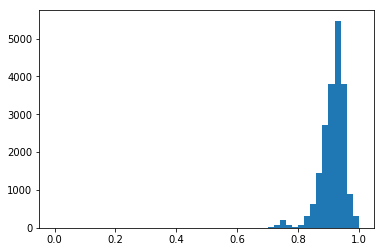

In [83]:
# k=4
JSresults4=[]
for i in idl:
    JSresults4.append(JacSim(charkgram(uniflna_HA_sub1.loc[[i[0]]].sequences.values[0],4),charkgram(uniflna_HA_sub1.loc[[i[1]]].sequences.values[0],4)))
plt.hist(JSresults4, 50, range=(0,1));

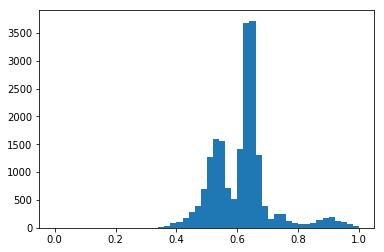

In [84]:
# k=5
JSresults5=[]
for i in idl:
    JSresults5.append(JacSim(charkgram(uniflna_HA_sub1.loc[[i[0]]].sequences.values[0],5),charkgram(uniflna_HA_sub1.loc[[i[1]]].sequences.values[0],5)))
plt.hist(JSresults5, 50, range=(0,1));

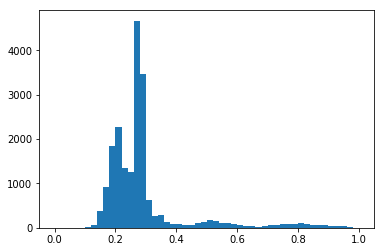

In [85]:
# k=6
JSresults6=[]
for i in idl:
    JSresults6.append(JacSim(charkgram(uniflna_HA_sub1.loc[[i[0]]].sequences.values[0],6),charkgram(uniflna_HA_sub1.loc[[i[1]]].sequences.values[0],6)))
plt.hist(JSresults6, 50, range=(0,1));

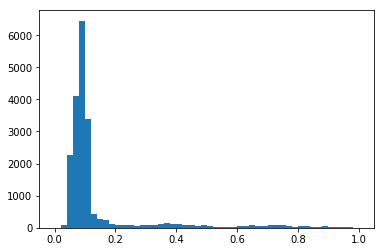

In [86]:
# k=7
JSresults7=[]
for i in idl:
    JSresults7.append(JacSim(charkgram(uniflna_HA_sub1.loc[[i[0]]].sequences.values[0],7),charkgram(uniflna_HA_sub1.loc[[i[1]]].sequences.values[0],7)))
plt.hist(JSresults7, 50, range=(0,1));

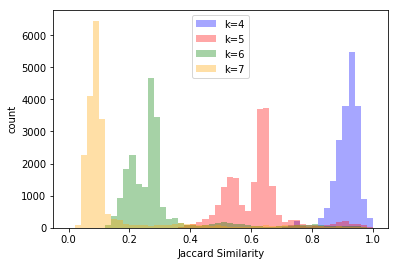

In [87]:
plt.hist(JSresults4, 50, range=(0,1), color='blue', alpha=0.35, label='k=4')
plt.hist(JSresults5, 50, range=(0,1), color='red', alpha=0.35, label='k=5')
plt.hist(JSresults6, 50, range=(0,1), color='green', alpha=0.35, label='k=6')
plt.hist(JSresults7, 50, range=(0,1), color='orange', alpha=0.35, label='k=7')
plt.xlabel("Jaccard Similarity")
plt.ylabel("count")
plt.legend();

In [22]:
def JacDist(a,b):
    top = len(a & b)
    bottom = len(a | b)
    return(1-top/bottom)

In [23]:
uniflna_HA.head()


,titles,sequences
21,gi|60504|gb|X17224|Influenza A virus (STRAIN A...,AAAACAACCAAAATGAAAGCAAAACTACTAGTCCTGTTATGTGCAT...
28,gi|60723|gb|X13551|Influenza B virus HA gene f...,ACTCATGGTAGTAACATCCAATGCAGATCGAATCTGCACTGGGATA...
29,gi|60728|gb|X13552|Influenza B virus (B/USSR/1...,ACTCATGGTAGTAACATCCAACGCAGATCGAATCTGCACTGGGATA...
30,gi|60733|gb|X13553|Influenza B virus HA gene f...,ACTCATGGTAGTAACATCCAATGCAGATCGAATCTGCACTGGGATA...
31,gi|60738|gb|X13550|Influenza B virus (B/Bonn/4...,ACTCATGGTAGTAACATCCAATGCAGATCGAATCTGCACTGGGATA...


In [24]:
uniflna_HA.iloc[0]

titles       gi|60504|gb|X17224|Influenza A virus (STRAIN A...
sequences    AAAACAACCAAAATGAAAGCAAAACTACTAGTCCTGTTATGTGCAT...
Name: 21, dtype: object

In [25]:
uniflna_HA.iloc[1]

titles       gi|60723|gb|X13551|Influenza B virus HA gene f...
sequences    ACTCATGGTAGTAACATCCAATGCAGATCGAATCTGCACTGGGATA...
Name: 28, dtype: object

In [26]:
uniflna_HA.iloc[2].sequences

'ACTCATGGTAGTAACATCCAACGCAGATCGAATCTGCACTGGGATAACATCTTCAAACTCCCCCCATGTGGTCAAAACAGCTACTCAAGGGGAAGTTAATGTGACTGGTGTGATACCACTGACAACAACACCAACCAAATCTCATTTTGCAAATCTCAAAGGAACAAAGACCAGAGGGAAACTATGCCCAAACTGTCTCAACTGCACAGATCTGGACGTGGCCTTGGGCAGACCAAAGTGTATGGGGACCATACCTTCGGCAAAAGCTTCAATACTCCACGAAGTCAAACCTGTTACATCTGGGTGCTTTCCTATAATGCACGACAGAACAAAAATCAGACAGCTACCCAATCTTCTCAGAGGATATGAAAATATCAGGTTATCAACCCGTAACGTTATCAACGCAGAAAGGGCACCAGGAGGACCCTACATAATTGGAACCTCAGGATCTTGCCCTAACGTTACCAATGGAAACGGATTCTTCGCAACAATGGCTTGGGCTGTCCCAAAAGACAACAAAACAGCAACGGATCCATTAACAATAGAAGTACCATACATTTGTACAAAAGGAGAAGACCAAATTACTGTTTGGGGGTTCCATTCTGATAACAAAAACCAAATGGTAAAACTCTATGGAGACTCAAAGCCTCAAAAGTTCACCTCATCTGCCAATGGAGTAACCACACATTATGTTTCTCAGATTGGTGGTTTCCCAAATCAAACAGAAGACGGAGGGCTACCACAAAGCGGCAGAATTGTTGTTGATTACATGGTGCAGAAACCTGGAAAACCAGGAACAATTGTCTATCAAAGAGGTGTTTTATTGCCTCAAAAAGTGTGGTGCGCAAGTGGCAGGAGCAAGGTAATAAAAGGGTCCTTGCCTTTAATTGGTGAAGCAGATTGCCTCCACGAAAAATACGGTGGATTAAACAAAAGCAAGCCTTACTACACAGGAGAACATGCAAAAGCCATAGGAAATTGCCCAATATGGGTGAAAAC

In [27]:
JacSim(charkgram(uniflna_HA.iloc[0].sequences,5), charkgram(uniflna_HA.iloc[1].sequences,5))

0.5594237695078031

In [28]:
JacSim(charkgram(uniflna_HA.iloc[1].sequences,5), charkgram(uniflna_HA.iloc[2].sequences,5))

0.8986666666666666

In [29]:
JacSim(charkgram(uniflna_HA.iloc[2].sequences,5), charkgram(uniflna_HA.iloc[3].sequences,5))

0.9014647137150466

In [30]:
JacDist(charkgram(uniflna_HA.iloc[0].sequences,5), charkgram(uniflna_HA.iloc[1].sequences,5))

0.44057623049219685

In [31]:
JacDist(charkgram(uniflna_HA.iloc[1].sequences,5), charkgram(uniflna_HA.iloc[2].sequences,5))

0.10133333333333339

In [32]:
JacDist(charkgram(uniflna_HA.iloc[2].sequences,5), charkgram(uniflna_HA.iloc[3].sequences,5))

0.09853528628495345

### Jaccard Distances!

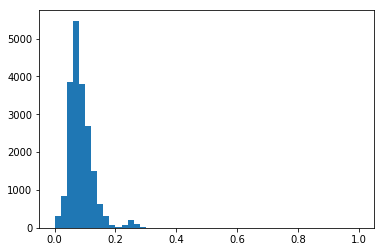

In [88]:
# k=4
JDresults4=[]
for i in idl:
    JDresults4.append(JacDist(charkgram(uniflna_HA_sub1.loc[[i[0]]].sequences.values[0],4),charkgram(uniflna_HA_sub1.loc[[i[1]]].sequences.values[0],4)))
plt.hist(JDresults4, 50, range=(0,1));

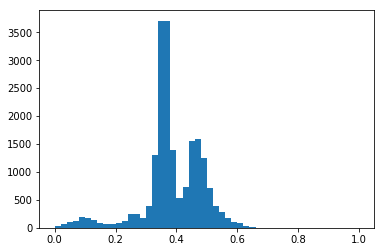

In [89]:
# k=5
JDresults5=[]
for i in idl:
    JDresults5.append(JacDist(charkgram(uniflna_HA_sub1.loc[[i[0]]].sequences.values[0],5),charkgram(uniflna_HA_sub1.loc[[i[1]]].sequences.values[0],5)))
plt.hist(JDresults5, 50, range=(0,1));

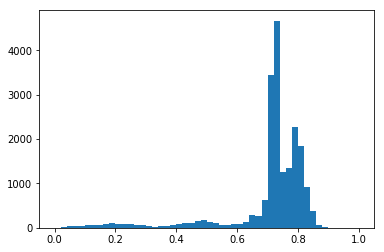

In [90]:
# k=6
JDresults6=[]
for i in idl:
    JDresults6.append(JacDist(charkgram(uniflna_HA_sub1.loc[[i[0]]].sequences.values[0],6),charkgram(uniflna_HA_sub1.loc[[i[1]]].sequences.values[0],6)))
plt.hist(JDresults6, 50, range=(0,1));

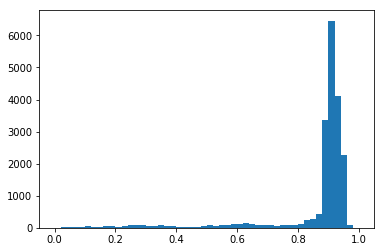

In [91]:
# k=7
JDresults7=[]
for i in idl:
    JDresults7.append(JacDist(charkgram(uniflna_HA_sub1.loc[[i[0]]].sequences.values[0],7),charkgram(uniflna_HA_sub1.loc[[i[1]]].sequences.values[0],7)))
plt.hist(JDresults7, 50, range=(0,1));

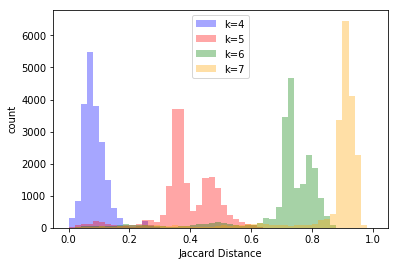

In [92]:
plt.hist(JDresults4, 50, range=(0,1), color='blue', alpha=0.35, label='k=4')
plt.hist(JDresults5, 50, range=(0,1), color='red', alpha=0.35, label='k=5')
plt.hist(JDresults6, 50, range=(0,1), color='green', alpha=0.35, label='k=6')
plt.hist(JDresults7, 50, range=(0,1), color='orange', alpha=0.35, label='k=7')
plt.xlabel("Jaccard Distance")
plt.ylabel("count")
plt.legend();

make a dataframe with the indices and JDs with different values of k.  
just to be clear, the values in the indices column are the index values from the uniflna_HA_sub1 dataframe which actually refer to the original indices.

In [93]:
Jdistance_sub1 = pd.DataFrame(
    {'indices': idl,
     'JDk4': JDresults4,
     'JDk5': JDresults5,
     'JDk6': JDresults6,
     'JDk7': JDresults7
    })

In [94]:
Jdistance_sub1.head()

,indices,JDk4,JDk5,JDk6,JDk7
0,"(430939, 263646)",0.071146,0.355429,0.738653,0.918396
1,"(430939, 9315)",0.157258,0.481338,0.724579,0.814076
2,"(430939, 629402)",0.067460,0.348028,0.724190,0.909028
3,"(430939, 62558)",0.091633,0.385528,0.762582,0.928880
4,"(430939, 286026)",0.028112,0.102828,0.214865,0.286311


In [95]:
Jdistance_sub1.tail()

,indices,JDk4,JDk5,JDk6,JDk7
19895,"(96277, 126934)",0.008163,0.033708,0.059144,0.075965
19896,"(96277, 215931)",0.055556,0.347876,0.720537,0.896936
19897,"(389645, 126934)",0.079365,0.347271,0.713262,0.899429
19898,"(389645, 215931)",0.071429,0.334852,0.695521,0.880000
19899,"(126934, 215931)",0.063492,0.347876,0.718500,0.894200


In [96]:
Jdistance_sub1.shape

(19900, 5)

### Second random sample

In [97]:
uniflna_HA_sub2 = uniflna_HA.sample(n=200)

In [98]:
idl2=list(it.combinations(list(uniflna_HA_sub2.index),2))

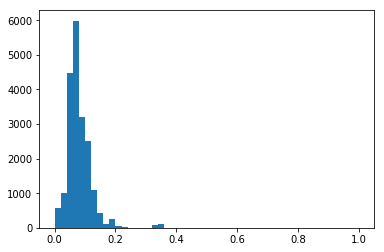

In [99]:
# k=4
JDresults42=[]
for i in idl2:
    JDresults42.append(JacDist(charkgram(uniflna_HA_sub2.loc[[i[0]]].sequences.values[0],4),charkgram(uniflna_HA_sub2.loc[[i[1]]].sequences.values[0],4)))
plt.hist(JDresults42, 50, range=(0,1));

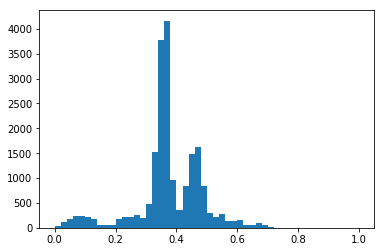

In [100]:
# k=5
JDresults52=[]
for i in idl2:
    JDresults52.append(JacDist(charkgram(uniflna_HA_sub2.loc[[i[0]]].sequences.values[0],5),charkgram(uniflna_HA_sub2.loc[[i[1]]].sequences.values[0],5)))
plt.hist(JDresults52, 50, range=(0,1));

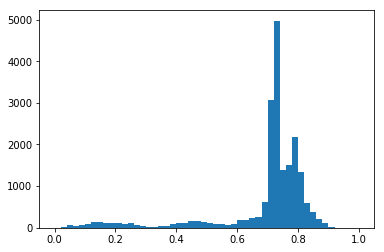

In [101]:
# k=6
JDresults62=[]
for i in idl2:
    JDresults62.append(JacDist(charkgram(uniflna_HA_sub2.loc[[i[0]]].sequences.values[0],6),charkgram(uniflna_HA_sub2.loc[[i[1]]].sequences.values[0],6)))
plt.hist(JDresults62, 50, range=(0,1));

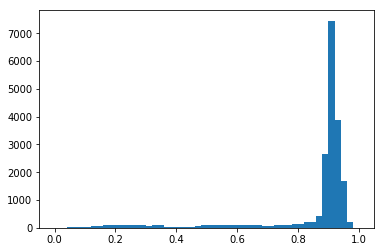

In [102]:
# k=7
JDresults72=[]
for i in idl2:
    JDresults72.append(JacDist(charkgram(uniflna_HA_sub2.loc[[i[0]]].sequences.values[0],7),charkgram(uniflna_HA_sub2.loc[[i[1]]].sequences.values[0],7)))
plt.hist(JDresults72, 50, range=(0,1));

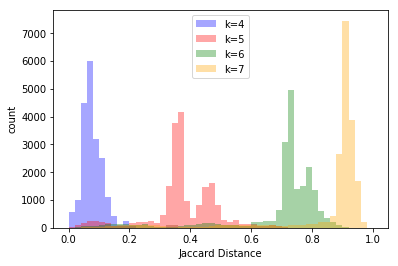

In [103]:
plt.hist(JDresults42, 50, range=(0,1), color='blue', alpha=0.35, label='k=4')
plt.hist(JDresults52, 50, range=(0,1), color='red', alpha=0.35, label='k=5')
plt.hist(JDresults62, 50, range=(0,1), color='green', alpha=0.35, label='k=6')
plt.hist(JDresults72, 50, range=(0,1), color='orange', alpha=0.35, label='k=7')
plt.xlabel("Jaccard Distance")
plt.ylabel("count")
plt.legend();

In [104]:
# dataframe of distances for sub-sample2
Jdistance_sub2 = pd.DataFrame(
    {'indices': idl2,
     'JDk4': JDresults42,
     'JDk5': JDresults52,
     'JDk6': JDresults62,
     'JDk7': JDresults72
    })

In [105]:
Jdistance_sub2.head()

,indices,JDk4,JDk5,JDk6,JDk7
0,"(46623, 53144)",0.071713,0.383803,0.726209,0.915049
1,"(46623, 312008)",0.059524,0.358885,0.730061,0.906526
2,"(46623, 146653)",0.051383,0.350694,0.700052,0.881873
3,"(46623, 358762)",0.059524,0.317857,0.634981,0.825534
4,"(46623, 314943)",0.063492,0.328671,0.720632,0.904091


In [106]:
Jdistance_sub2.tail()

,indices,JDk4,JDk5,JDk6,JDk7
19895,"(149231, 240946)",0.117647,0.485612,0.800835,0.939407
19896,"(149231, 46238)",0.102362,0.484262,0.806667,0.938914
19897,"(63399, 240946)",0.141129,0.549125,0.830664,0.950333
19898,"(63399, 46238)",0.140562,0.558108,0.847759,0.954574
19899,"(240946, 46238)",0.105263,0.365152,0.575526,0.694466


In [107]:
Jdistance_sub2.sample(12)

,indices,JDk4,JDk5,JDk6,JDk7
5269,"(60329, 92882)",0.095238,0.481928,0.804062,0.937047
3053,"(350602, 437802)",0.080000,0.336867,0.695720,0.882353
10094,"(69021, 484781)",0.055556,0.360179,0.741239,0.913885
2997,"(350602, 88848)",0.134694,0.459873,0.798539,0.923495
19120,"(573870, 181615)",0.032258,0.107792,0.201778,0.268177
13835,"(429091, 16330)",0.055556,0.377752,0.727177,0.905306
578,"(312008, 308500)",0.055336,0.359770,0.725077,0.900036
10575,"(282109, 63708)",0.123506,0.492806,0.820397,0.942689
7664,"(78862, 230666)",0.074219,0.344470,0.695763,0.879244
17556,"(13500, 511113)",0.112403,0.367698,0.722727,0.901714


### Also checking NA gene to make sure pattern with increasing k is not just in HA

In [63]:
uniflna_NA = uniflna.loc[uniflna.iloc[:,0].str.contains(r'\(NA\) | neuraminidase | (segment 6)')]

/home/brian/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  """Entry point for launching an IPython kernel.


In [64]:
uniflna_NA.shape

(66339, 2)

In [65]:
np.random.seed(12478)
uniflna_NA_sub1 = uniflna_NA.sample(n=200)
uniflna_NA_sub2 = uniflna_NA.sample(n=200)

In [66]:
idl3=list(it.combinations(list(uniflna_NA_sub1.index),2))

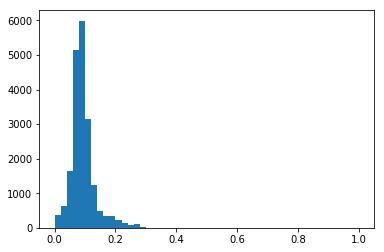

In [67]:
# k=4
JDresults4n1=[]
for i in idl3:
    JDresults4n1.append(JacDist(charkgram(uniflna_NA_sub1.loc[[i[0]]].sequences.values[0],4),charkgram(uniflna_NA_sub1.loc[[i[1]]].sequences.values[0],4)))
plt.hist(JDresults4n1, 50, range=(0,1));

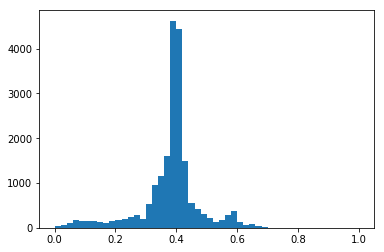

In [68]:
# k=5
JDresults5n1=[]
for i in idl3:
    JDresults5n1.append(JacDist(charkgram(uniflna_NA_sub1.loc[[i[0]]].sequences.values[0],5),charkgram(uniflna_NA_sub1.loc[[i[1]]].sequences.values[0],5)))
plt.hist(JDresults5n1, 50, range=(0,1));

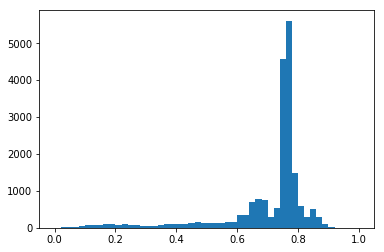

In [69]:
# k=6
JDresults6n1=[]
for i in idl3:
    JDresults6n1.append(JacDist(charkgram(uniflna_NA_sub1.loc[[i[0]]].sequences.values[0],6),charkgram(uniflna_NA_sub1.loc[[i[1]]].sequences.values[0],6)))
plt.hist(JDresults6n1, 50, range=(0,1));

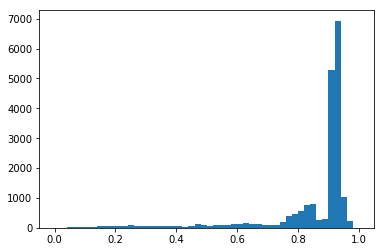

In [70]:
# k=7
JDresults7n1=[]
for i in idl3:
    JDresults7n1.append(JacDist(charkgram(uniflna_NA_sub1.loc[[i[0]]].sequences.values[0],7),charkgram(uniflna_NA_sub1.loc[[i[1]]].sequences.values[0],7)))
plt.hist(JDresults7n1, 50, range=(0,1));

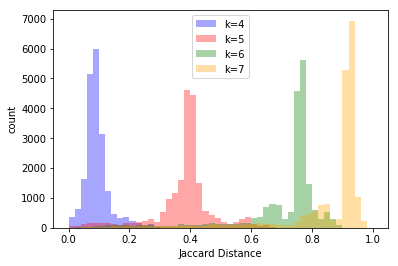

In [71]:
plt.hist(JDresults4n1, 50, range=(0,1), color='blue', alpha=0.35, label='k=4')
plt.hist(JDresults5n1, 50, range=(0,1), color='red', alpha=0.35, label='k=5')
plt.hist(JDresults6n1, 50, range=(0,1), color='green', alpha=0.35, label='k=6')
plt.hist(JDresults7n1, 50, range=(0,1), color='orange', alpha=0.35, label='k=7')
plt.xlabel("Jaccard Distance")
plt.ylabel("count")
plt.legend();